In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor

#### Generating Sinusoid 

In [21]:
# parameter setting
amp = 1          # range [0.0, 1.0], 진폭/세기.
sr = 10000       # Continuous analog to discrete digital. 여기선 1초당 1만개! 이거도 단위는 Hz.
# sampling rate, Hz, 우리는 얼마나 쪼개어 볼 수 있는지 - 얼마나 discrete하게 갈건지 고르긴 해야 함. analog to digital. 옛 전화가 8000.
#사람의 한계는? 4만 얼마였죠. 최대 가청주파수 2만에 연관.
dur = 0.5        # in seconds
freq = 100.0     # sine/wave frequency, Hz - 높낮이 결정하지.

hz는 그냥 일반론적인 단위, 어떤 실체를 측정하더라도 1초에 몇 번? 이라고 말하는 방향이라면 다 쓸 수 있음. 

sampling rate나 frequency나 그냥 세는 유닛 단위의 문제니까, hz 단위를 사용해서 문제될건 없다.

모든 소리는, sin 곡선의 합. 각각 변조된 다양한 웨이브를 조합해서 만들어진 덩어리가 소리.

음성 wave 자체의 특성은 amp와 freq이 결정.

당연하게도, sin함수도 numpy에서 가져오는 것. 하다못해 파이값도 그렇지.

논항은, 각도(radian). 그러니까 theta 벡터 만드는거지. 

물론, 물리적인 소리를 원한다면? 시간에 엮여있어야 한다. 그거에 각도를 연동시켜서 원하는 소리의 기본을 제작. 

##### X축은 언제나 시간

In [24]:
# 간단한 예시
print(np.sin(np.pi/4)) #어우 np 드글드글한거 봐..

0.7071067811865476


In [22]:
# generate time
t = np.arange(1, sr * dur+1)/sr 
#깨알같이, 파이썬에서는 *연산자가 우선순위가 더 높다는거도 알 수 있다.
#레인지 끝값은 잘리니까, +1 해줘서 5000번쨰까지.
#1/10000 ~ 5000/10000까지지. 0.00001초부터 0.5000초까지.

np.arange(1,sr + 1)/sr -> 이게 딱 1초짜리 타임벡터지 뭐. 더 늘리려니까 x dur이 들어가는거고.

이런 벡터 길이 재는 거는? 당연히 익숙해져야지. dur = 1 이면 sr개, dur = 0.5 면 sr/2겠고.

In [28]:
# generate phase
# sin은 각도를 논항으로 하는 함수니까. 시간을 각도로.
theta = t * 2*np.pi * freq   

# 1초에 2*pi를 freq 회 만큼 돈다. 1순환이 2pi이기때문에 이건 고정이고, 그 순환 몇번 도는지를 freq이 결정하는거지.
# sync된 각도값.

In [29]:
# generate signal by cosine-phasor
s = np.sin(theta)

s에는, 모든 generate 된 sin함수 값이 들어와있는거지.

Text(0, 0.5, 'real')

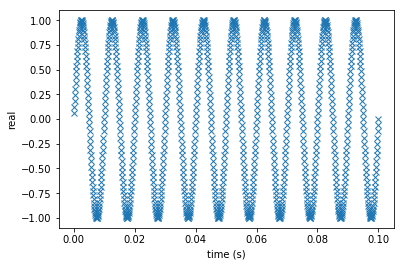

In [34]:
# Syntax for plotting

fig = plt.figure() # 이거 클로저네. 객체생성.
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], 'x') # '.' 이건 매트랩이랑 똑같구만. 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

시각화에 실제 필요한건? t-시간과 s-최종 사인값 뿐. theta같은건 여기서 의미없는 중간값이지.

저기 논항으로 넣어둔 111 의미는 이거 참조

https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=add_subplot#matplotlib.figure.Figure.add_subplot

In [39]:
ipd.Audio(s, rate=sr) #여기서도 쓸 수야 있다. rate = sr이라 함은, 결국 샘플링레이트 받는 논항이라는거지.

In [40]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

복소수 페이저. e ^ i * theta 이거였었는데...

근데 파이썬에서는 표현이 좀 다르네. 1j로 써야 우리가 흔히 아는 허수 i를 지정하는 예약어임. type(1j) = complex라고 나옴.

##### 복소수 활용. a+bi. b = 0이어야 실수고, 복소수 안에는 모든 실수가 있고.

복소수 값도 시각화할 수 있다. x축이 실수부-real, y축이 허수부-imag 값을 갖게 복소평면에 plotting 하면 됨. 이게, 모든 실수를 x축 선상에 올려두고, 거기에 복소수 값을 더해서 평면에 뿌려준다고 보면 됨. 

복소수 페이저를 real로 뜯어 열면 cos, imag로 뜯어 열면 sin.

Text(0.5, 0, 'imag')

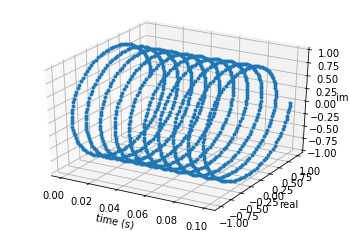

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') # 그냥 exp 돌리고, 그걸 각각 .real .imag 메소드로 끌어오네.
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [74]:
ipd.Audio(s, rate=sr)

<IPython.core.display.Javascript object>


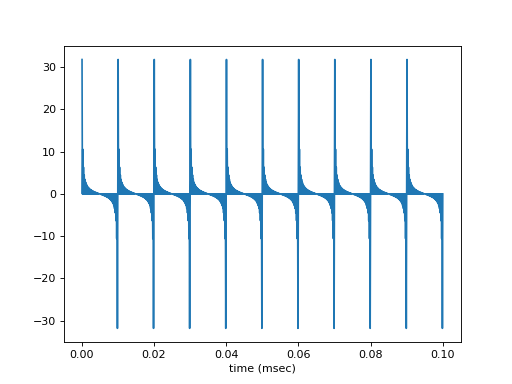

In [125]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)